# Poisson's equation

In [3]:
# Import libraries.
from matplotlib import pyplot, cm
from mpl_toolkits import mplot3d
import numpy

%matplotlib inline

In [4]:
# Update default font family and size for Matplotlib figures.
pyplot.rc('font', family='serif', size=16)

## Problem setup

Let's consider the following Poisson equation:

$$
\nabla^2 p = -2 \left( \frac{\pi}{2} \right)^2 \sin \left( \pi \frac{x}{L_x} \right) \cos \left( \pi \frac{y}{L_y} \right)
$$

in the domain $\Omega = \left[ 0, 1 \right] \times \left[ -0.5, 0.5 \right]$ with $L_x = L_y = 1$.

Let's use a Dirichlet condition $u = 0$ on all boundaries and $u = 0$ as our initial guess.

## Analytical solution

$$
p \left( x, y \right) = \sin \left( \pi \frac{x}{L_x} \right) \cos \left( \pi \frac{y}{L_y} \right)
$$

In [5]:
def poisson_solution(x, y, Lx, Ly):
    """Compute the analytical solution.

    Parameters
    ----------
    x : numpy.ndarray
        Coordinates in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Coordinates in the y direction as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    p : numpy.ndarray
        The analytical solution as a 2D array of floats.

    """
    ###
    # To do: Compute the analytical solution.
    ###
    X, Y = numpy.meshgrid(x,y)
    p = (-2. * (numpy.pi/2)**2) * numpy.sin(numpy.pi * x / Lx) * numpy.cos(numpy.pi * y / Ly)
    
    return p

In [6]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    """Create a 3D surface plot of the scalar field `p`.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    p : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction; default: 'z'.
    elev : float, optional
        Elevation angle in the z plane; default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane; default: 45.0.

    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

In [15]:
# Set parameters.
Lx, Ly = 1.0, 1.0  # lengths of the domain
nx, ny = 41, 41  # number of points along each direction
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # grid-spacing sizes

# Set the grid-point coordinates.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(-0.5 * Ly, 0.5 * Ly, num=ny)

###
# To do: Compute and plot the analytical solution.
###
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)


IndexError: too many indices for array

## Initial solution

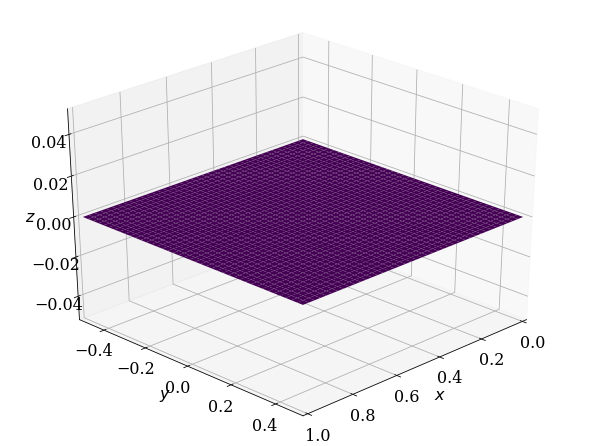

In [18]:
# Set the initial conditions.
p0 = numpy.zeros((ny, nx))

# Compute the source term.
b = poisson_source(x, y, Lx, Ly)

# Plot the initial scalar field.
plot_3d(x, y, p0)

## Source term

$$
\nabla^2 p = b
$$

with

$$
b = -2 \left( \frac{\pi}{2} \right)^2 \sin \left( \pi \frac{x}{L_x} \right) \cos \left( \pi \frac{y}{L_y} \right)
$$

In [19]:
def poisson_source(x, y, Lx, Ly):
    """
    Computes and returns the source term (right-hand side)
    of the Poisson equation.
    
    Parameters
    ----------
    x : numpy.ndarray
        The gridline locations in the x direction
        as a 1D array of floats.
    y : numpy.ndarray
        The gridline locations in the y direction
        as a 1D array of floats.
    Lx : float
        Domain length in the x direction.
    Ly : float
        Domain length in the y direction.
    
    Returns
    -------
    b : numpy.ndarray of floats
        The forcing function as a 2D array.
    """
    X, Y = numpy.meshgrid(x, y)
    b = (-2.0 * numpy.pi / Lx * numpy.pi / Ly *
         numpy.sin(numpy.pi * X / Lx) *
         numpy.cos(numpy.pi * Y / Ly))
    return b

In [20]:
###
# To do: Compute the source term.
###
poisson_source(x, y, Lx, Ly)


array([[-0.00000000e+00, -9.48317785e-17, -1.89078888e-16, ...,
        -1.89078888e-16, -9.48317785e-17, -1.48020358e-31],
       [-0.00000000e+00, -1.21511208e-01, -2.42273259e-01, ...,
        -2.42273259e-01, -1.21511208e-01, -1.89663557e-16],
       [-0.00000000e+00, -2.42273259e-01, -4.83052822e-01, ...,
        -4.83052822e-01, -2.42273259e-01, -3.78157775e-16],
       ...,
       [-0.00000000e+00, -2.42273259e-01, -4.83052822e-01, ...,
        -4.83052822e-01, -2.42273259e-01, -3.78157775e-16],
       [-0.00000000e+00, -1.21511208e-01, -2.42273259e-01, ...,
        -2.42273259e-01, -1.21511208e-01, -1.89663557e-16],
       [-0.00000000e+00, -9.48317785e-17, -1.89078888e-16, ...,
        -1.89078888e-16, -9.48317785e-17, -1.48020358e-31]])

## Jacobi method

$$
u_{i, j}^{k+1} = \frac{1}{4} \left( u_{i, j-1}^k + u_{i-1, j}^k + u_{i+1, j}^k + u_{i, j+1}^k - b_{i, j} \right)
$$

In [21]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Poisson equation for a given forcing term
    using Jacobi relaxation method.

    The function assumes Dirichlet boundary conditions with value zero.
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    b : numpy.ndarray
        The forcing term as a 2D array of floats.
    dx : float
        Grid spacing in the x direction.
    dy : float
        Grid spacing in the y direction.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    conv : list
        The convergence history as a list of floats.
    """
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        # Dirichlet boundary conditions at automatically enforced.
        # Compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [24]:
# L2- Norm Difference Function
def l2_norm(u, u_ref):
    l2_diff = (numpy.sqrt(numpy.sum((u-u_ref)**2)) / 
              numpy.sqrt(numpy.sum(u_ref**2)))
    return l2_diff

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


Jacobi relaxation: 3125 iterations to reach a relative difference of 1.9958631078740742e-07


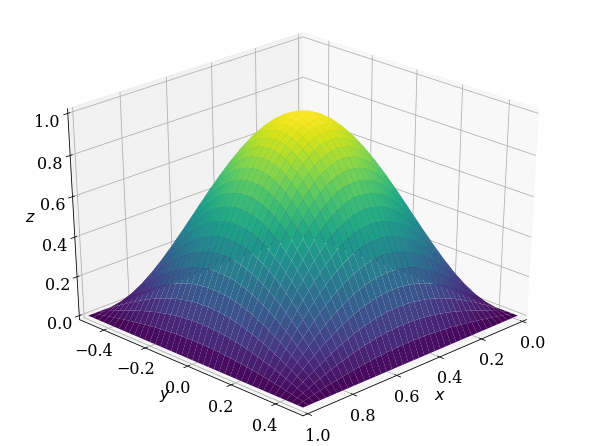

In [26]:
###
# To do: Compute the numerical solution of the Poisson equation.
# Question: How many iterations was needed?
# Question: What's the value of the final residual?
###

# Compute the solution using Jacobi relaxation method.
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv[-1]))
# Compute the analytical solution.
p_exact = poisson_solution(x, y, Lx, Ly)

###
# To do: Plot the numerical solution.
###
# Plot the solution.
plot_3d(x, y, p)

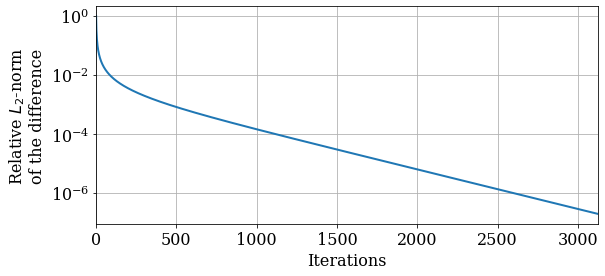

In [27]:
###
# To do: Plot (semilog) the convergence history.
###
# Plot the convergence history.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.xlabel('Iterations')
pyplot.ylabel('Relative $L_2$-norm\nof the difference')
pyplot.grid()
pyplot.semilogy(conv, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0, len(conv));

## Spatial convergence analysis

In [33]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    nx = int(Lx/dx) + 1
    ny = int(Ly/dx) + 1
    x = numpy.linspace(0, Lx, num=nx)
    y = numpy.linspace(0, Ly, num=ny)
    
    # To do: Re-set the initial guess.
    u0 = numpy.zeros((ny, nx))
    u0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

    # To do: Re-compute the source term.
    poisson_source(x, y, Lx, Ly)
    
    # To do: Relax the solution with Jacobi.
    poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6)
    
    # To do: Compute the analytical solution.
    p_exact = poisson_solution(x, y, Lx, Ly)

#     # Compute the relative L2-norm of the error.
#     l2_norm(p, p_exact)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

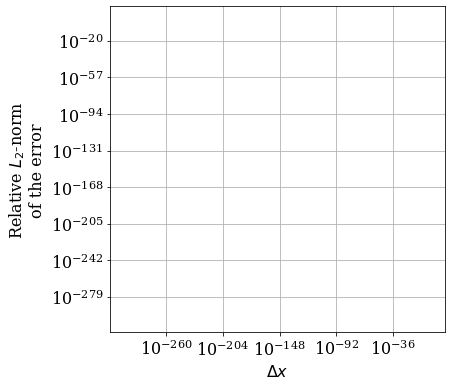

In [36]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
# Plot the error versus the grid-spacing size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(dx_vals) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');